In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def model(y, t):
    theta1, theta2, theta3 = y
    dydt = [theta2, theta3, -0.5*theta1*theta3]
    return dydt

In [33]:
t = np.linspace(0, 5, 1000)
sol = odeint(model, [0, 0, 1], t)

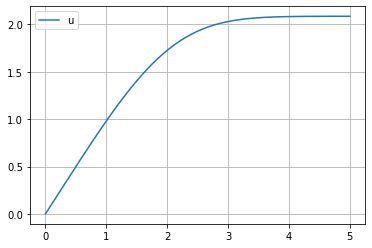

In [34]:
plt.plot(t,sol[:,1], label="u")
plt.grid()
plt.legend();

In [35]:
def rungekutta4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = np.array(f(y[i], t[i]))
        k2 = np.array(f(y[i] + k1 * h / 2, t[i] + h / 2))
        k3 = np.array(f(y[i] + k2 * h / 2, t[i] + h / 2))
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [36]:
t2 = np.linspace(0, 5, 1000)
y0 = np.array([0, 0, 1])
sol2 = rungekutta4(model, y0, t2)

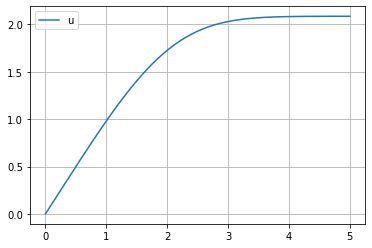

In [37]:
plt.plot(t2, sol2[:, 1], label='u')
plt.legend(loc='best')
plt.grid()
plt.show()